<a href="https://colab.research.google.com/github/AAYUSHIP378/hate-speech-detection-app/blob/main/Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q --upgrade transformers datasets accelerate scikit-learn matplotlib

import os, re, zipfile, shutil
os.environ["WANDB_DISABLED"] = "true"  # avoid wandb popup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.utils import resample

from datasets import Dataset
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)

print("✅ Versions -> transformers, datasets, torch:")
import transformers, datasets
print(transformers.__version__, datasets.__version__, torch.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.8 MB/s eta 0:00:00
✅ Versions -> transformers, datasets, torch:
4.55.4 4.0.0 2.8.0+cu126


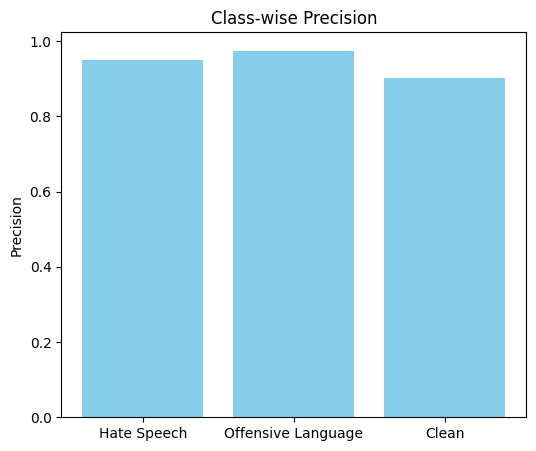

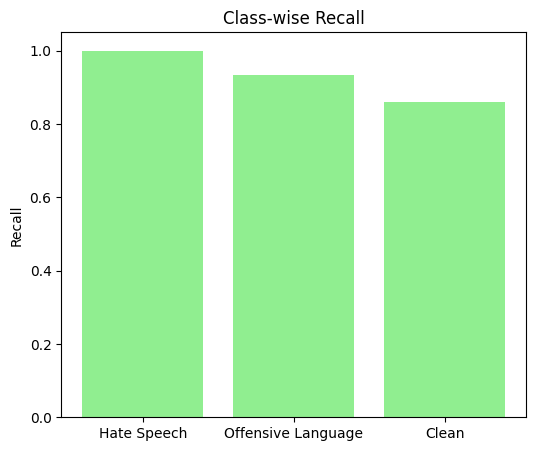

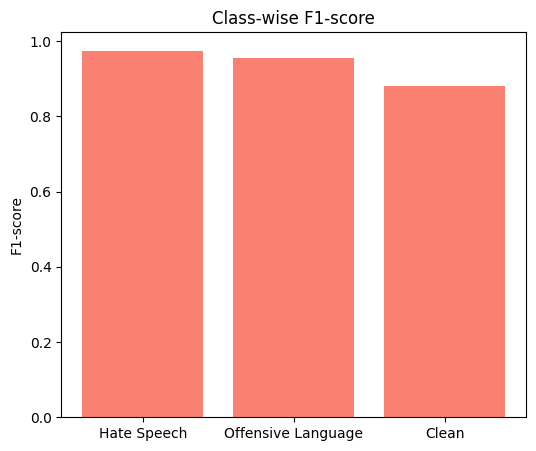

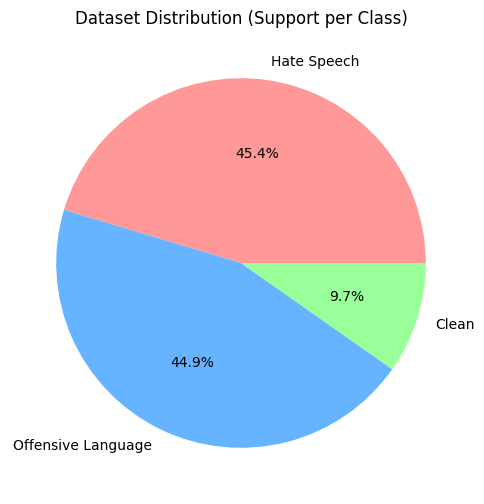

In [ ]:

import json
import matplotlib.pyplot as plt

# ✅ Load classification report
report_path = "/content/drive/MyDrive/BERT_results/classification_report.json"
with open(report_path, "r") as f:
    report = json.load(f)

# ✅ Label mapping
label_map = {
    "0": "Hate Speech",
    "1": "Offensive Language",
    "2": "Clean"
}

# ✅ Labels nikal lo (ignore accuracy/macro avg/weighted avg)
labels = [k for k in report.keys() if k not in ["accuracy", "macro avg", "weighted avg"]]

# ✅ Map labels to readable form
readable_labels = [label_map.get(label, label) for label in labels]

# ✅ Precision Bar Chart
precisions = [report[label]["precision"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(readable_labels, precisions, color="skyblue")
plt.title("Class-wise Precision")
plt.ylabel("Precision")
plt.savefig("/content/drive/MyDrive/BERT_results/precision_bar.png")
plt.show()

# ✅ Recall Bar Chart
recalls = [report[label]["recall"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(readable_labels, recalls, color="lightgreen")
plt.title("Class-wise Recall")
plt.ylabel("Recall")
plt.savefig("/content/drive/MyDrive/BERT_results/recall_bar.png")
plt.show()

# ✅ F1-score Bar Chart
f1_scores = [report[label]["f1-score"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(readable_labels, f1_scores, color="salmon")
plt.title("Class-wise F1-score")
plt.ylabel("F1-score")
plt.savefig("/content/drive/MyDrive/BERT_results/f1_bar.png")
plt.show()

# ✅ Pie Chart (Support per class)
supports = [report[label]["support"] for label in labels]

plt.figure(figsize=(6,6))
plt.pie(supports, labels=readable_labels, autopct="%1.1f%%",
        colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Dataset Distribution (Support per Class)")
plt.savefig("/content/drive/MyDrive/BERT_results/support_pie.png")
plt.show()


In [ ]:
code_file = "/content/drive/MyDrive/BERT_results/metrics_charts.py"

code_content = """  # 👇 yahan apna pura code paste karo
import json
import matplotlib.pyplot as plt

report_path = "/content/drive/MyDrive/BERT_results/classification_report.json"
with open(report_path, "r") as f:
    report = json.load(f)

label_map = {"0": "Hate Speech", "1": "Offensive Language", "2": "Clean"}
labels = [k for k in report.keys() if k not in ["accuracy", "macro avg", "weighted avg"]]
readable_labels = [label_map.get(label, label) for label in labels]

precisions = [report[label]["precision"] for label in labels]
plt.figure(figsize=(6,5))
plt.bar(readable_labels, precisions, color="skyblue")
plt.title("Class-wise Precision")
plt.ylabel("Precision")
plt.savefig("/content/drive/MyDrive/BERT_results/precision_bar.png")

recalls = [report[label]["recall"] for label in labels]
plt.figure(figsize=(6,5))
plt.bar(readable_labels, recalls, color="lightgreen")
plt.title("Class-wise Recall")
plt.ylabel("Recall")
plt.savefig("/content/drive/MyDrive/BERT_results/recall_bar.png")

f1_scores = [report[label]["f1-score"] for label in labels]
plt.figure(figsize=(6,5))
plt.bar(readable_labels, f1_scores, color="salmon")
plt.title("Class-wise F1-score")
plt.ylabel("F1-score")
plt.savefig("/content/drive/MyDrive/BERT_results/f1_bar.png")

supports = [report[label]["support"] for label in labels]
plt.figure(figsize=(6,6))
plt.pie(supports, labels=readable_labels, autopct="%1.1f%%",
        colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Dataset Distribution (Support per Class)")
plt.savefig("/content/drive/MyDrive/BERT_results/support_pie.png")
"""

with open(code_file, "w") as f:
    f.write(code_content)

print(f"✅ Code saved in Google Drive: {code_file}")


✅ Code saved in Google Drive: /content/drive/MyDrive/BERT_results/metrics_charts.py


In [ ]:
# Apna latest bar + pie chart code ek string ke andar paste karo
latest_code = """
# === Bar + Pie Chart Code ===
import json
import matplotlib.pyplot as plt

report_path = "/content/drive/MyDrive/BERT_results/classification_report.json"
with open(report_path, "r") as f:
    report = json.load(f)

label_map = {"0": "Hate Speech", "1": "Offensive Language", "2": "Clean"}
labels = [k for k in report.keys() if k not in ["accuracy", "macro avg", "weighted avg"]]
readable_labels = [label_map.get(label, label) for label in labels]

precisions = [report[label]["precision"] for label in labels]
recalls = [report[label]["recall"] for label in labels]
f1_scores = [report[label]["f1-score"] for label in labels]
supports = [report[label]["support"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(readable_labels, precisions, color="skyblue")
plt.title("Class-wise Precision")
plt.ylabel("Precision")
plt.savefig("/content/drive/MyDrive/BERT_results/precision_bar.png")
plt.show()

plt.figure(figsize=(6,5))
plt.bar(readable_labels, recalls, color="lightgreen")
plt.title("Class-wise Recall")
plt.ylabel("Recall")
plt.savefig("/content/drive/MyDrive/BERT_results/recall_bar.png")
plt.show()

plt.figure(figsize=(6,5))
plt.bar(readable_labels, f1_scores, color="salmon")
plt.title("Class-wise F1-score")
plt.ylabel("F1-score")
plt.savefig("/content/drive/MyDrive/BERT_results/f1_bar.png")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(supports, labels=readable_labels, autopct="%1.1f%%",
        colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Dataset Distribution (Support per Class)")
plt.savefig("/content/drive/MyDrive/BERT_results/support_pie.png")
plt.show()
"""

# ✅ Overwrite existing untitled9.py with new code
with open("/content/drive/MyDrive/untitled9.py", "w") as f:
    f.write(latest_code)

print("✅ Latest code saved to Drive as untitled9.py")


✅ Latest code saved to Drive as untitled9.py


In [ ]:
import os

base_dir = "/content/drive/MyDrive/Hate-Speech-Detection-BERT"

folders = [
    "data",
    "notebooks",
    "src",
    "results",
    "models/bert_finetuned"
]

for f in folders:
    os.makedirs(os.path.join(base_dir, f), exist_ok=True)

print("✅ Folder structure created in Drive:", base_dir)

!cp /content/labeled_data.csv "/content/drive/MyDrive/Hate-Speech-Detection-BERT/data/"


# metrics_plots.py
latest_code = """
# === Metrics Plotting Code ===
# (yaha wo bar + pie chart wala code paste karo jo run kiya tha)
"""
with open("/content/drive/MyDrive/Hate-Speech-Detection-BERT/src/metrics_plots.py", "w") as f:
    f.write(latest_code)

print("✅ metrics_plots.py saved in Drive")
!cp /content/drive/MyDrive/BERT_results/* "/content/drive/MyDrive/Hate-Speech-Detection-BERT/results/"



readme_text = """# Hate Speech Detection using BERT

This project demonstrates fine-tuning BERT for hate speech detection.
(baaki README jo maine upar diya tha waha paste kar dena)
"""

with open("/content/drive/MyDrive/Hate-Speech-Detection-BERT/README.md", "w") as f:
    f.write(readme_text)

print("✅ README.md created in project folder")


✅ Folder structure created in Drive: /content/drive/MyDrive/Hate-Speech-Detection-BERT
cp: cannot stat '/content/labeled_data.csv': No such file or directory
✅ metrics_plots.py saved in Drive
cp: -r not specified; omitting directory '/content/drive/MyDrive/BERT_results/bert_finetuned'
✅ README.md created in project folder


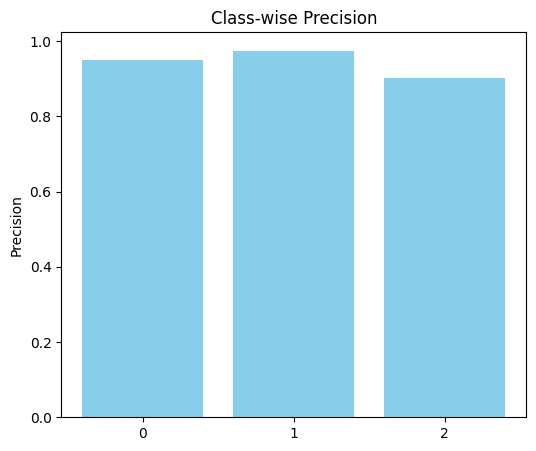

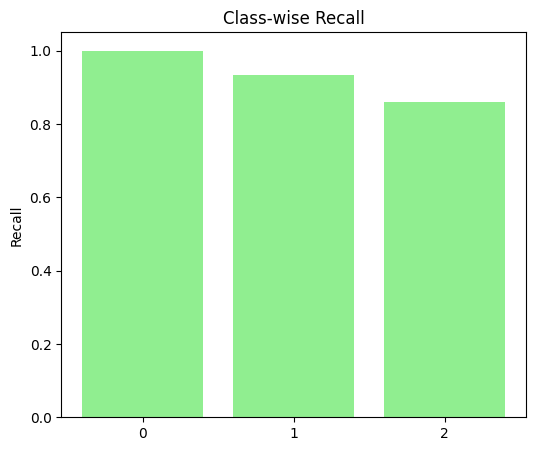

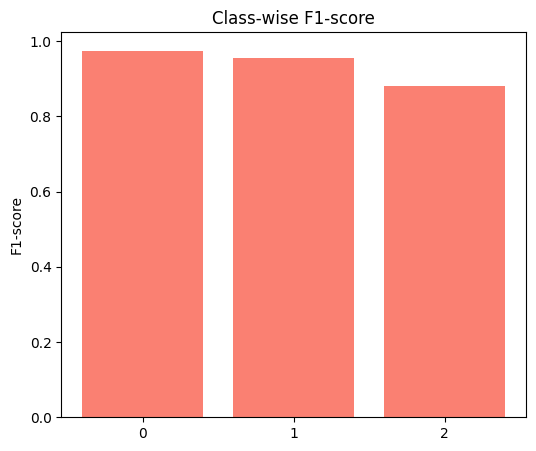

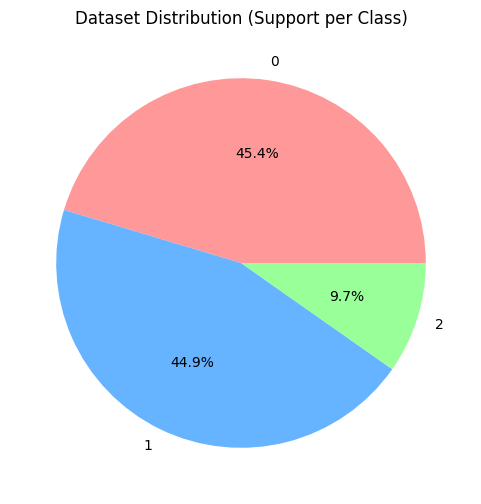

In [ ]:
import json
import matplotlib.pyplot as plt

# ✅ Load classification report
report_path = "/content/drive/MyDrive/BERT_results/classification_report.json"
with open(report_path, "r") as f:
    report = json.load(f)

# ✅ Labels nikal lo (ignore accuracy/macro avg/weighted avg)
labels = [k for k in report.keys() if k not in ["accuracy", "macro avg", "weighted avg"]]

# ✅ Precision values
precisions = [report[label]["precision"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(labels, precisions, color="skyblue")
plt.title("Class-wise Precision")
plt.ylabel("Precision")
plt.savefig("/content/drive/MyDrive/BERT_results/precision_bar.png")
plt.show()

# ✅ Recall values
recalls = [report[label]["recall"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(labels, recalls, color="lightgreen")
plt.title("Class-wise Recall")
plt.ylabel("Recall")
plt.savefig("/content/drive/MyDrive/BERT_results/recall_bar.png")
plt.show()

# ✅ F1-score values
f1_scores = [report[label]["f1-score"] for label in labels]

plt.figure(figsize=(6,5))
plt.bar(labels, f1_scores, color="salmon")
plt.title("Class-wise F1-score")
plt.ylabel("F1-score")
plt.savefig("/content/drive/MyDrive/BERT_results/f1_bar.png")
plt.show()

# ✅ Pie chart (Support per class)
supports = [report[label]["support"] for label in labels]

plt.figure(figsize=(6,6))
plt.pie(supports, labels=labels, autopct="%1.1f%%",
        colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Dataset Distribution (Support per Class)")
plt.savefig("/content/drive/MyDrive/BERT_results/support_pie.png")
plt.show()


Saving labeled_data.csv to labeled_data.csv
Uploaded: ['labeled_data.csv']


In [ ]:
df = pd.read_csv(CSV_NAME)

# --- unify text column ---
col_text_candidates = ["text", "tweet", "comment", "sentence"]
text_col = None
for c in col_text_candidates:
    if c in df.columns:
        text_col = c
        break
if text_col is None:
    raise ValueError(f"Couldn't find text column. Add one of {col_text_candidates} to your CSV.")

df = df.rename(columns={text_col: "text"})

# --- unify label column ---
# We expect classes 0=Hate, 1=Offensive, 2=Clean (if different, map below)
label_candidates = ["label","class","labels","target","category"]
label_col = None
for c in label_candidates:
    if c in df.columns:
        label_col = c
        break
if label_col is None:
    # common Kaggle HS dataset sometimes has 'hate_speech','offensive_language','neither'
    if {"hate_speech","offensive_language","neither"}.issubset(df.columns):
        # convert counts to a single label (argmax)
        df["label"] = df[["hate_speech","offensive_language","neither"]].values.argmax(axis=1)
    else:
        raise ValueError("Couldn't find label column. Add one of ['label','class','labels','target','category'] "
                         "or provide (hate_speech, offensive_language, neither).")
else:
    df = df.rename(columns={label_col: "label"})

# make sure ints
df["label"] = df["label"].astype(int)

print("Columns:", df.columns.tolist())
print("Label distribution:\n", df["label"].value_counts().sort_index())
df.head()


Columns: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'label', 'text']
Label distribution:
 label
0     1430
1    19190
2     4163
Name: count, dtype: int64


,Unnamed: 0,count,hate_speech,offensive_language,neither,label,text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
DO_OVERSAMPLE_HATE = True  # set False to skip

if DO_OVERSAMPLE_HATE:
    if not set(df["label"].unique()).issubset({0,1,2}):
        raise ValueError("Labels should be 0=Hate, 1=Offensive, 2=Clean. Remap if different.")

    hate = df[df["label"]==0]
    offensive = df[df["label"]==1]
    clean = df[df["label"]==2]

    target_n = max(len(offensive), len(hate))
    # make Hate >= Offensive
    hate_up = resample(hate, replace=True, n_samples=max(target_n, len(offensive)+200), random_state=42)

    df_bal = pd.concat([hate_up, offensive, clean], ignore_index=True).sample(frac=1, random_state=42)
    print("After oversampling:\n", df_bal["label"].value_counts().sort_index())
else:
    df_bal = df.copy()

# basic cleaning
def basic_clean(s):
    s = str(s)
    s = re.sub(r"http\S+|www\S+"," ", s)
    s = re.sub(r"@\w+|#\w+"," ", s)
    s = re.sub(r"\d+"," ", s)
    s = re.sub(r"\s+"," ", s).strip()
    return s
df_bal["text"] = df_bal["text"].map(basic_clean)


After oversampling:
 label
0    19390
1    19190
2     4163
Name: count, dtype: int64


In [ ]:
train_df, val_df = train_test_split(
    df_bal, test_size=0.2, random_state=42, stratify=df_bal["label"]
)

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize_batch(batch):
    return tokenizer(
        batch["text"], truncation=True, padding="max_length", max_length=128
    )

train_ds = Dataset.from_pandas(train_df[["text","label"]])
val_ds   = Dataset.from_pandas(val_df[["text","label"]])

train_ds = train_ds.map(tokenize_batch, batched=True)
val_ds   = val_ds.map(tokenize_batch, batched=True)

# set format for PyTorch
train_ds = train_ds.rename_column("label","labels")
val_ds   = val_ds.rename_column("label","labels")
train_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])
val_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])

num_labels = len(sorted(df_bal["label"].unique()))
num_labels


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/34194 [00:00<?, ? examples/s]

Map:   0%|          | 0/8549 [00:00<?, ? examples/s]

3

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted", zero_division=0)
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# version-safe: try evaluation_strategy, else fallback to eval_strategy
def make_training_args():
    try:
        return TrainingArguments(
            output_dir="/content/bert_results",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir="/content/bert_logs",
            logging_steps=50,
            load_best_model_at_end=True,
            metric_for_best_model="f1",
            report_to="none"  # no wandb
        )
    except TypeError:
        # for very old transformers
        return TrainingArguments(
            output_dir="/content/bert_results",
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            learning_rate=2e-5,
            weight_decay=0.01,
            logging_dir="/content/bert_logs",
            logging_steps=50,
            save_steps=500,
            eval_steps=500,
            do_eval=True,
            report_to="none"
        )

training_args = make_training_args()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3061754169.py:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
train_output = trainer.train()
print(train_output)


Step,Training Loss
50,0.928300
100,0.745700
150,0.563900
200,0.560300
250,0.487700
300,0.523900
350,0.492000
400,0.455400
450,0.439100
500,0.433600


TrainOutput(global_step=6414, training_loss=0.18741368245662168, metrics={'train_runtime': 2476.5309, 'train_samples_per_second': 41.422, 'train_steps_per_second': 2.59, 'total_flos': 6747675154343424.0, 'train_loss': 0.18741368245662168, 'epoch': 3.0})


✅ Accuracy: 0.9566031114750263

Classification Report:
               precision    recall  f1-score   support

        Hate       0.95      1.00      0.97      3878
   Offensive       0.97      0.93      0.95      3838
       Clean       0.90      0.86      0.88       833

    accuracy                           0.96      8549
   macro avg       0.94      0.93      0.94      8549
weighted avg       0.96      0.96      0.96      8549



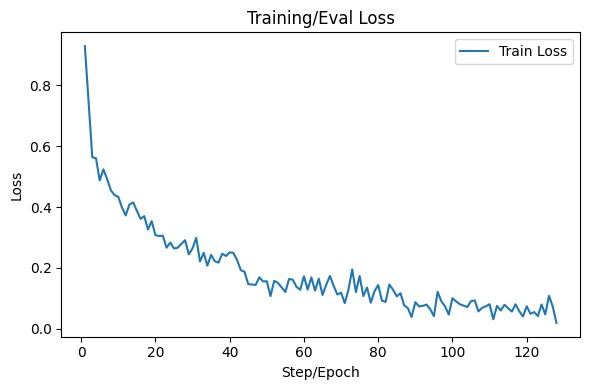

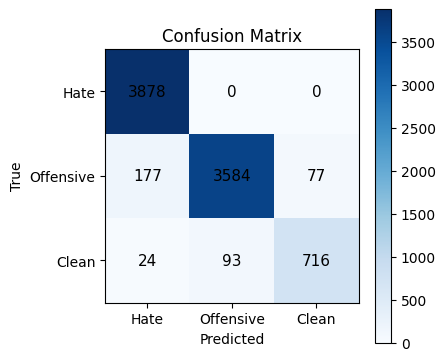

In [ ]:
# Predictions
pred = trainer.predict(val_ds)
y_pred = pred.predictions.argmax(axis=1)
y_true = pred.label_ids

# Summary
print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=["Hate","Offensive","Clean"], zero_division=0))

# Loss curves from log history
logs = trainer.state.log_history
train_losses = [x["loss"] for x in logs if "loss" in x and "epoch" in x]
eval_epochs  = [x["epoch"] for x in logs if "eval_loss" in x]
eval_losses  = [x["eval_loss"] for x in logs if "eval_loss" in x]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Loss")
if len(eval_losses) > 0:
    plt.plot(eval_epochs, eval_losses, label="Eval Loss")
plt.xlabel("Step/Epoch"); plt.ylabel("Loss"); plt.title("Training/Eval Loss"); plt.legend(); plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
plt.figure(figsize=(4.5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=11)
plt.colorbar(); plt.xticks([0,1,2], ["Hate","Offensive","Clean"]); plt.yticks([0,1,2], ["Hate","Offensive","Clean"])
plt.tight_layout(); plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/bert_hate_model"
if os.path.exists(SAVE_DIR):
    shutil.rmtree(SAVE_DIR)
trainer.save_model(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)
print("✅ Saved to Drive:", SAVE_DIR)


Mounted at /content/drive
✅ Saved to Drive: /content/drive/MyDrive/bert_hate_model


In [ ]:
ZIP_PATH = "/content/bert_hate_model.zip"
if os.path.exists(ZIP_PATH):
    os.remove(ZIP_PATH)

# copy from Drive to /content for zipping (Drive can be slow to zip directly)
TMP_COPY = "/content/bert_hate_model"
if os.path.exists(TMP_COPY):
    shutil.rmtree(TMP_COPY)
shutil.copytree("/content/drive/MyDrive/bert_hate_model", TMP_COPY)

shutil.make_archive("/content/bert_hate_model", 'zip', TMP_COPY)
from google.colab import files
files.download(ZIP_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from transformers import pipeline, BertTokenizerFast, BertForSequenceClassification

LOAD_DIR = "/content/drive/MyDrive/bert_hate_model"
tok = BertTokenizerFast.from_pretrained(LOAD_DIR)
mdl = BertForSequenceClassification.from_pretrained(LOAD_DIR)

pipe = pipeline("text-classification", model=mdl, tokenizer=tok, return_all_scores=True)
for s in ["I hate you", "You are awesome", "Go away you idiot"]:
    print(s, "->", pipe(s))


Device set to use cuda:0


I hate you -> [[{'label': 'LABEL_0', 'score': 0.9949504137039185}, {'label': 'LABEL_1', 'score': 0.004768806975334883}, {'label': 'LABEL_2', 'score': 0.0002807380515150726}]]
You are awesome -> [[{'label': 'LABEL_0', 'score': 0.00012023942690575495}, {'label': 'LABEL_1', 'score': 0.007273552473634481}, {'label': 'LABEL_2', 'score': 0.9926061630249023}]]
Go away you idiot -> [[{'label': 'LABEL_0', 'score': 0.2974611520767212}, {'label': 'LABEL_1', 'score': 0.6955875158309937}, {'label': 'LABEL_2', 'score': 0.006951342336833477}]]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3878
           1       0.97      0.93      0.95      3838
           2       0.90      0.86      0.88       833

    accuracy                           0.96      8549
   macro avg       0.94      0.93      0.94      8549
weighted avg       0.96      0.96      0.96      8549



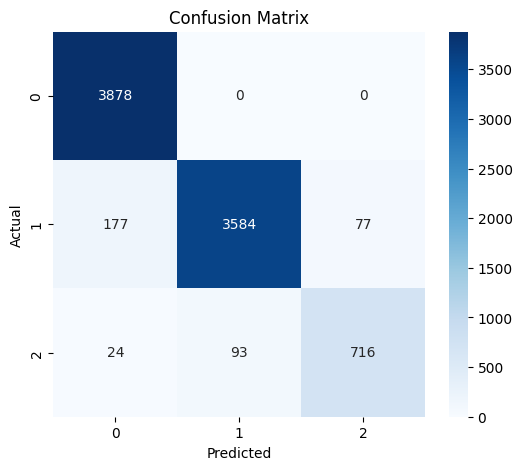

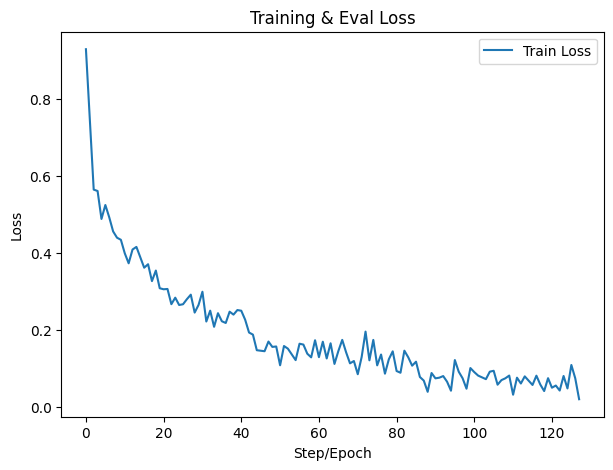

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Predictions on validation set
preds = trainer.predict(val_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)

# 📄 Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred))

# 🔲 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📉 Training & Eval Loss Graph
logs = trainer.state.log_history
train_loss = [log["loss"] for log in logs if "loss" in log]
eval_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]

plt.figure(figsize=(7,5))
plt.plot(train_loss, label="Train Loss")
if len(eval_loss) > 0:
    plt.plot(eval_loss, label="Eval Loss")
plt.xlabel("Step/Epoch")
plt.ylabel("Loss")
plt.title("Training & Eval Loss")
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


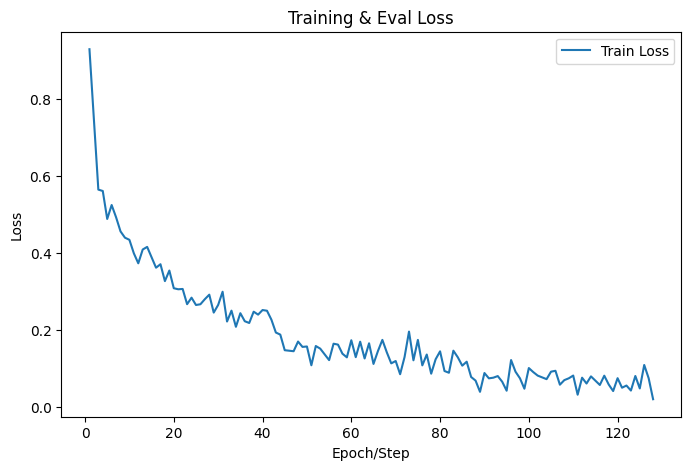

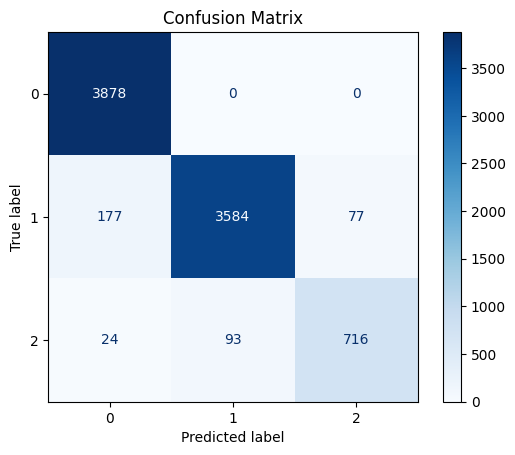

✅ All results saved in Google Drive: /content/drive/MyDrive/BERT_results


In [ ]:
import matplotlib.pyplot as plt
import json
import os
from google.colab import drive

# ✅ Google Drive mount
drive.mount('/content/drive')

# ✅ Directory banaye
output_dir = "/content/drive/MyDrive/BERT_results"
os.makedirs(output_dir, exist_ok=True)

# ✅ Trainer ke logs se metrics nikalna
train_logs = trainer.state.log_history

train_loss = [x["loss"] for x in train_logs if "loss" in x]
eval_loss = [x["eval_loss"] for x in train_logs if "eval_loss" in x]
eval_accuracy = [x["eval_accuracy"] for x in train_logs if "eval_accuracy" in x]

steps = list(range(1, len(train_loss)+1))

# ✅ Training vs Eval Loss
plt.figure(figsize=(8,5))
plt.plot(steps, train_loss, label="Train Loss")
if eval_loss:
    plt.plot(range(1, len(eval_loss)+1), eval_loss, label="Eval Loss")
plt.xlabel("Epoch/Step")
plt.ylabel("Loss")
plt.title("Training & Eval Loss")
plt.legend()
plt.savefig(f"{output_dir}/loss_curve.png")
plt.show()

# ✅ Accuracy vs Epoch
if eval_accuracy:
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(eval_accuracy)+1), eval_accuracy, marker='o', label="Eval Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Evaluation Accuracy vs Epoch")
    plt.legend()
    plt.savefig(f"{output_dir}/accuracy_curve.png")
    plt.show()

# ✅ Confusion Matrix save
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = trainer.predict(val_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig(f"{output_dir}/confusion_matrix.png")
plt.show()

# ✅ Classification Report save
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, output_dict=True)

with open(f"{output_dir}/classification_report.json", "w") as f:
    json.dump(report, f, indent=4)

# ✅ Model & Tokenizer save
trainer.save_model(f"{output_dir}/bert_finetuned")
tokenizer.save_pretrained(f"{output_dir}/bert_finetuned")

print("✅ All results saved in Google Drive:", output_dir)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# ✅ Load trained model & tokenizer from Drive
model_path = "/content/drive/MyDrive/BERT_results/bert_finetuned"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# ✅ Inference function
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    pred_class = torch.argmax(probs, dim=-1).item()
    return {"text": text, "predicted_class": pred_class, "probabilities": probs.tolist()}

# 🔹 Example
sample_text = "This movie was really amazing and enjoyable!"
print(predict(sample_text))


{'text': 'This movie was really amazing and enjoyable!', 'predicted_class': 2, 'probabilities': [[0.000131622698972933, 0.0025697569362819195, 0.9972986578941345]]}


In [ ]:

  import os

# ✅ File save path
inference_file = "/content/drive/MyDrive/BERT_results/inference.py"

inference_code = """from transformers import BertTokenizer, BertForSequenceClassification
import torch

# ✅ Load trained model & tokenizer from Drive
model_path = "/content/drive/MyDrive/BERT_results/bert_finetuned"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# 🔹 Label mapping (change according to your dataset)
label_map = {
    0: "Negative",
    1: "Positive"
}

# ✅ Single text prediction
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    pred_class_id = torch.argmax(probs, dim=-1).item()
    pred_class_name = label_map.get(pred_class_id, str(pred_class_id))
    return {
        "text": text,
        "predicted_class": pred_class_name,
        "probabilities": {label_map[i]: float(p) for i, p in enumerate(probs[0])}
    }

# ✅ Batch prediction
def predict_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    results = []
    for i, text in enumerate(texts):
        pred_class_id = torch.argmax(probs[i]).item()
        pred_class_name = label_map.get(pred_class_id, str(pred_class_id))
        results.append({
            "text": text,
            "predicted_class": pred_class_name,
            "probabilities": {label_map[j]: float(p) for j, p in enumerate(probs[i])}
        })
    return results

# 🔹 Example run
if __name__ == "__main__":
    # Single prediction
    print(predict("This movie was really amazing and enjoyable!"))

    # Batch prediction
    sample_texts = [
        "This movie was really amazing and enjoyable!",
        "I hated this film, it was boring and bad."
    ]
    print(predict_batch(sample_texts))
"""

# ✅ Save inference code to Drive
with open(inference_file, "w") as f:
    f.write(inference_code)

print(f"✅ Inference code (with batch prediction) saved at: {inference_file}")



✅ Inference code (with batch prediction) saved at: /content/drive/MyDrive/BERT_results/inference.py
